In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [2]:
path = "./data/Vaccinations/vacsi-a-dep-2021-02-03-20h15.csv"
data_vaccinations = spark.read.load(path, format="csv", header=True, inferSchema="True")

data_vaccinations.printSchema()

root
 |-- dep: string (nullable = true)
 |-- clage_vacsi: integer (nullable = true)
 |-- jour: string (nullable = true)
 |-- n_dose1: integer (nullable = true)
 |-- n_cum_dose1: integer (nullable = true)



In [21]:
dep_vac = data_vaccinations.groupBy(["dep"]).sum("n_dose1").withColumnRenamed("sum(n_dose1)", "sum_vac").sort(["dep"])
dep_vac.printSchema()

root
 |-- dep: string (nullable = true)
 |-- sum_vac: long (nullable = true)



In [8]:
import matplotlib.pyplot as plt
import numpy as np

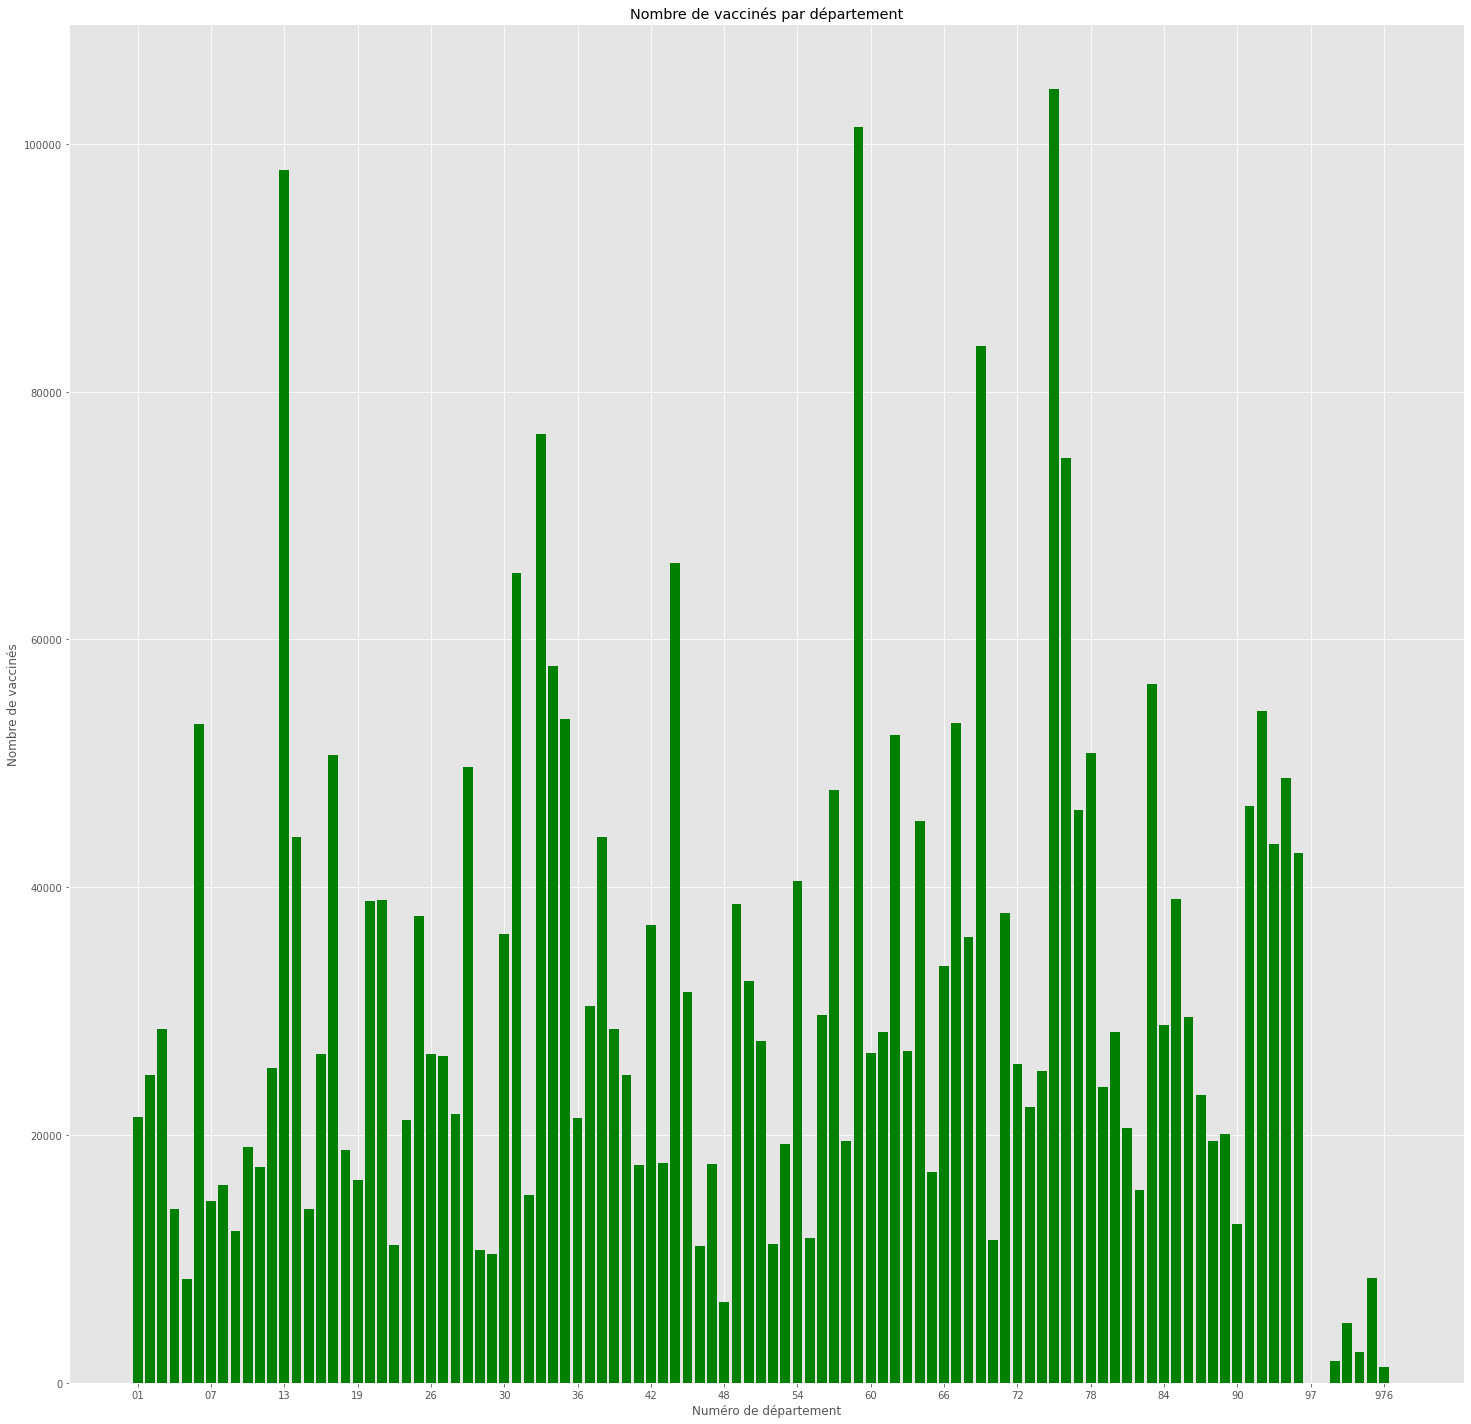

In [38]:
plt.style.use('ggplot')

x = dep_vac.select('dep').rdd.map(lambda row : row[0]).collect()

y = dep_vac.select('sum_vac').rdd.map(lambda row : row[0]).collect()

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='green')
plt.xlabel("Numéro de département")
plt.ylabel("Nombre de vaccinés")
plt.title("Nombre de vaccinés par département")

plt.xticks(x_pos, x)

fig = plt.gcf()
fig.set_size_inches(25,25)
plt.locator_params(axis='x', nbins=20)
plt.show()